In [37]:
# Check for missing values in your DataFrame
missing_values = df.isnull().sum()
print(missing_values)


customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



# Load the CSV file
df=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Identify the string columns
string_columns = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object for each string column
## This line caused the error:
#label_encoders[column] = LabelEncoder()

## Replace the above line with the following two lines:
label_encoders = {}
for column in string_columns:
    label_encoders[column] = LabelEncoder()

# Encode the string values in each column
for column in string_columns:
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target
#X = df.drop('Churn', axis=1)

#X=df.drop('customerID', axis=1)
X = df.drop(columns=['Churn', 'customerID'])

y = df['Churn']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



# Create the logistic regression model
model = LogisticRegression(C=0.1)
"""
This code uses a regularization parameter of C=0.1. This means that the model will be penalized for having large coefficients.
"""
# Fit the model to the encoded data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = model.score(X_test, y_test)

# Calculate the confusion matrix
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix)
print('Classification report:\n', classification_report)


Accuracy: 0.7898921067575241
Confusion matrix:
 [[1134  159]
 [ 211  257]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1293
           1       0.62      0.55      0.58       468

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761



D:\ImageClassification\imageclassification\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


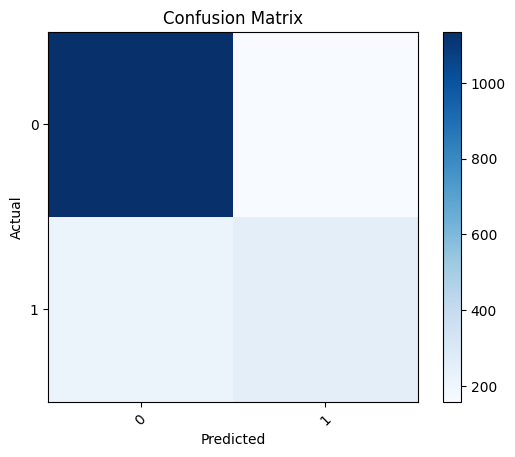

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='Blues')

# Add labels to the plot
plt.xticks(range(len(cm)), labels=df.Churn.unique(), rotation=45)
plt.yticks(range(len(cm)), labels=df.Churn.unique())

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add a colorbar
plt.colorbar()

# Show the plot
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the CSV file
df=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Identify the string columns
string_columns = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object for each string column
label_encoders = {}
for column in string_columns:
    label_encoders[column] = LabelEncoder()

# Encode the string values in each column
for column in string_columns:
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the random forest model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = model.score(X_test, y_test)

# Print the accuracy
print('Accuracy:', accuracy)


Accuracy: 0.7796706416808632


In [ ]:
#!pip install xgboost

In [7]:
# Make a prediction for a new customer
import pandas as pd

# Create a new customer data frame
new_customer = {
    'customerID': 1000,
    'gender': 'Female',
    'SeniorCitizen': False,
    'Partner': False,
    'Dependents': False,
    'tenure': 12,
    'PhoneService': False,
    'MultipleLines': True,
    'InternetService': 'No',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 700.7,
    'TotalCharges': 151.65
}

# Encode the string values in the new customer data
new_customer_df = pd.DataFrame([new_customer])
string_columns = new_customer_df.select_dtypes(include=['object']).columns
for column in string_columns:
    new_customer_df[column] = label_encoders[column].transform(new_customer_df[column])



# One-hot encode the string columns
#new_customer_df = pd.get_dummies(new_customer_df, columns=string_columns)

# Drop the customerID column
new_customer_df.drop('customerID', axis=1, inplace=True)

# Print the new customer data frame
print(new_customer_df)




   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0          False    False       False      12         False   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0           True                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 0              3           700.7        151.65  


In [8]:
# Make a prediction for the new customer
prediction = model.predict_proba(new_customer_df)[0][1]

# Print the prediction
print('The predicted probability of churn for the new customer is:', prediction)


The predicted probability of churn for the new customer is: 0.57


In [62]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')